# INFO 634 Assignment 3 (12 points)

## Preparation

Before completing the assignment, please get yourself familiar with the models and techniques discussed in Week 6. In particular, you will be **well prepared** for the assignment if you have done **the following exercise**: 

+ [ ] [Probability and Linearity in Data](../demo/data_prob_linear.html)


## A. Data Preparation (1 points)

Please identify or prepare a text classification dataset. You can either: 
+ Find and download an **existing dataset**, OR
+ **Create a dataset** on your own

Some of the websites to search for a dataset: 
+ https://www.kaggle.com/datasets
+ https://archive.ics.uci.edu/ml/datasets.php
+ https://vincentarelbundock.github.io/Rdatasets/datasets.html

Specific **requirements** of your dataset: 
1. [ ] It has to have **text** data, e.g. abstracts, news reports. 
2. [ ] It has to have a **class** attribute, e.g. with at least **two** categories or labels.
3. [ ] It has to have at least: 
    + If it is an **existing dataset, 300+** data instances total and **100+** in each class, **OR**
    + If you **create** the dataset, **30+** data instances total and **10+** in each class. 
4. [ ] Please **avoid** any dataset already used in **existing** exercises or assignments in this class. 

Please do: 
+ [ ] Include a **link** to your data or **submit** your data. 
+ [ ] Include a **brief description** of your data, attributes, and instances. 
+ [ ] Discuss the classification **task** on the data and **objectives**. 

In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
from scipy import stats
from IPython.display import HTML, display

In [2]:
news = pd.read_csv("fake_or_real_news.csv", encoding="iso8859-1")

In [3]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
news.shape

(6335, 4)

In [5]:
#news = news.head(300)
#news.shape

## B. Probabilities and Zipf (3 points)

### B.1. Class Distributions and Probabilities (0.5 point)

Find out the number of instances in each class $c$ and compute it's probability $p(c)$. Compile a table like this (example): 

|   Class $c$    |  Instances $n_c$  |   Probability $p(c)$   |
|----------------|-------------------|------------------------|
| Fake           |    100            | $\frac{100}{300} = 1/3$|
| True           |    200            | $\frac{200}{300} = 2/3$|

In [6]:
classes = news["label"].value_counts()

In [7]:
total = len(news)
print("Class","Instances", "Probability")
for lab, val in zip(classes.index, classes):
    print(lab, val, round(val/total,2), sep="\t")

Class Instances Probability
REAL	3171	0.5
FAKE	3164	0.5


### B.2. Term Probabilities and Zipf's Law (2.5 points)

Conduct analysis in the following steps to obtain the term probability pattern in your text data. You can follow the example in [Probability and Linearity in Data](../demo/data_prob_linear.html) to use ```CountVectorizer``` from ```sklearn.feature_extraction.text```. 

In [8]:
# create the stop_words
from wordcloud import STOPWORDS
stop_words = set(STOPWORDS)
l = list(stop_words)
l.extend(['take', 'say','back','day','see','says','know','well','said', 'one', 'now', 
          'even', 'two', 'people','xi','xii','xiii','xiv','xv','xvi','may', 'will', 
          'use','aren', 'couldn', 'didn', 'doesn', 'don', 'had', 'has', 
          'have', 'is', 'us','let', 'll', 'mustn', 're', 'shan', 'shouldn', 
          've', 'wasn', 'weren', 'won', 'wouldn','go','much','iâ','d','m','s','t','â',
          'hadn', 'hasn', 'haven', 'isn','He', 'But', 'In', "I", "The", "This"])
stop_words = set(l)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a count vectorizer
vect = CountVectorizer(analyzer="word", stop_words=stop_words, token_pattern=r'\b[^\d\W]+\b')
# obtain vocabulary dictionary and return doc-term matrix
X = vect.fit_transform(news.text) 
# get the identified terms
terms = vect.get_feature_names()
# sum terms' frequencies in the entire collection
freqs = X.toarray().sum(axis=0)
terms = np.array(terms)
freqs = np.array(freqs)

# organize the terms and frequencies in t and f columns
tfs = pd.DataFrame({'t':terms, 'f':freqs}, columns=['t','f'])
tfs = tfs.sort_values(by=['f'], ascending=False)
tfs = tfs.reset_index(drop=True)
tfs.head()

,t,f
0,trump,19937
1,clinton,15503
2,new,9318
3,state,8854
4,president,8536


#### B.2.1. Rank, Frequency, and Probability

Rank terms by frequency and show the top five with probabilities (example): 

|      |t       |$k_t$ |$f_t$| $p_t$ |
|------|--------|------|-----|-------|
|0     |to      |1     |2242 |   |
|1     |you     |2     |2240 |   |
|2     |the     |3     |1328 |   |
|3     |and     |4     |979  |   |
|4     |in      |5     |898  |   |

In [10]:
tfs['k'] = tfs.index + 1
tfs[['t','k','f']].head()

,t,k,f
0,trump,1,19937
1,clinton,2,15503
2,new,3,9318
3,state,4,8854
4,president,5,8536


#### B.2.2. Probability vs. Rank Plot

Produce a probability $p_t$ vs. $k_t$ plot on **log-log** coordinates. 

In [11]:
ttf = tfs['f'].sum()
tfs['p'] = tfs['f'] / ttf
tfs[['t','k','p','f']].head()

,t,k,p,f
0,trump,1,0.007644,19937
1,clinton,2,0.005944,15503
2,new,3,0.003572,9318
3,state,4,0.003395,8854
4,president,5,0.003273,8536


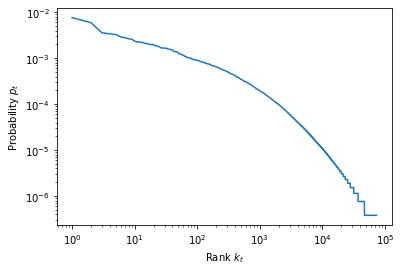

In [12]:
plt.loglog(tfs['k'], tfs['p'])
plt.xlabel('Rank $k_t$')
plt.ylabel('Probability $p_t$')
plt.show()

#### B.2.3. Regression line 

Use linear regression to fit the $log(p_t) \sim log(k_t)$ relation: 
1. Identify the **coefficient** value from the regression, e.g. a value like $-1.2$ means $p_t \propto \frac{1}{k_t^{1.2}}$. 
2. Plot the regression line on the $p_t$ vs. $k_t$ plot. 
3. Do your data follow Zipf's law? Discuss the visual pattern, the fitted coefficient, and the regression line. 

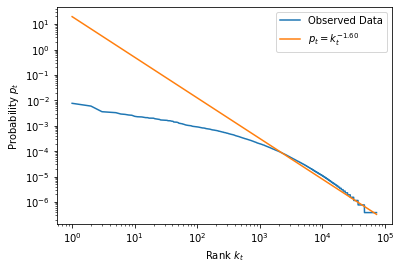

In [13]:
from sklearn.linear_model import LinearRegression

# log transformation of k and p values
x = tfs['k'].values.reshape(-1,1)
xlog = np.log(x)
y = tfs['p'].values.reshape(-1,1)
ylog = np.log(y)

# perform linear regression on log values
lm = LinearRegression()
lm.fit(xlog,ylog)
yplog = lm.predict(xlog)

# plot the fitted (predicted) line 
# along with actual k_t and p_t data
plt.loglog(tfs['k'], tfs['p'], label="Observed Data")
plt.loglog(x, np.exp(yplog), 
           label="$p_t = k_t^{" + "{:.2f}".format(lm.coef_[0][0]) + "}$")
plt.xlabel('Rank $k_t$')
plt.ylabel('Probability $p_t$')
plt.legend()
plt.show()

In [14]:
lm.coef_[0][0]

-1.59902822274253

So the fitted line is roughly: 

\begin{eqnarray} 
    p_t & = & k_t^{-1.6} \\
    & = & \frac{1}{k_t^{1.6}}
\end{eqnarray}

Not exactly $p_t = \frac{1}{k_t}$ as the Zipf's law suggests. 

## C. Text Vectorization (2 points)

### C.1. Training and Test Data

Split your data into $80\%$ training and $20\%$ test data. 

In [15]:
# generate random true (80% chance) or false values
news  = news[["text", "label"]]
train_index = np.random.rand(len(news)) < 0.8
# use the above list to take the training (true values)
train = news[train_index]
# the opposite (rest) is for testing
test = news[~train_index]

### C.2. Text Vectorization

Use the ```CountVectorizer``` to: 
1. [ ] Vectorize (fit) your **training** data, based on the ```text``` field. 
2. [ ] Your vectorizer should now have a set of **features** (words) from the training data 
3. [ ] Transform your **test** data (text field), with the same vectorizer. 

In [16]:
vect = CountVectorizer(analyzer="word", stop_words=stop_words, token_pattern=r'\b[^\d\W]+\b',
                      lowercase=False)
X_train = vect.fit_transform(train.text)

In [17]:
X_test = vect.transform(test.text)

### C.3. Terms and Conditional Probabilities

**Think** about two terms (words): 
1. [ ] One term (word) $t_1$ that is relevant to one class $c_1$, e.g. ```prize``` for a **spam** class for spam classification. 
2. [ ] A second term (word) $t_2$ that is relevant to another class $c_2$. 

Identify their conditional probabilities: 

\begin{eqnarray}
p(t_1|c_1) & = & ... \\
p(t_1|c_2) & = & ... \\
p(t_2|c_1) & = & ... \\
p(t_2|c_2) & = & ... \\
\end{eqnarray}

Discuss and explain: 
1. [ ] What do these probabilities mean? 
2. [ ] Are the above probability values reasonable (sensible)? Why or why not? 
3. [ ] Do you think they will be helpful in the classification task?

In [18]:
real_index = train['label']=='REAL'
real = train[real_index]
fake = train[~real_index]
X_real = vect.transform(real.text)
X_fake = vect.transform(fake.text)
X_real.shape

(2566, 82872)

In [19]:
# obtain real news vocabulary 
terms = vect.get_feature_names()
# sum terms' frequencies in the entire collection
freqs = X_real.toarray().sum(axis=0)
real_terms = np.array(terms)
real_freqs = np.array(freqs)

In [20]:
real_f = X_real.toarray().sum(axis=0)
real_ttf = real_f.sum()

fake_f = X_fake.toarray().sum(axis=0)
fake_ttf = fake_f.sum()

## Checking probability of each term for both the classes for p > 0.002

In [22]:
for word in terms:
    t2 = word
    i2 = terms.index(t2)
    f = real_f[i2]
    p = f / real_ttf
    ps = (f+1)/(real_ttf+2)
    if p > 0.003:
        print("p({:s}|real) = {:.7f}, smoothed to {:.7f}".format(t2, p, ps))

    f = fake_f[i2]
    p = f / fake_ttf
    ps = (f+1)/(fake_ttf+2)
    if p > 0.003:
        print("p({:s}|fake) = {:.7f}, smoothed to {:.7f}".format(t2, p, ps))

p(Clinton|real) = 0.0060361, smoothed to 0.0060369
p(Clinton|fake) = 0.0050513, smoothed to 0.0050523
p(Hillary|fake) = 0.0034927, smoothed to 0.0034938
p(Obama|real) = 0.0034541, smoothed to 0.0034549
p(Republican|real) = 0.0031568, smoothed to 0.0031575
p(Trump|real) = 0.0091905, smoothed to 0.0091913
p(Trump|fake) = 0.0050429, smoothed to 0.0050440
p(campaign|real) = 0.0034910, smoothed to 0.0034918


In [23]:
#t1 = Hillary for fake news
t1 = "Hillary"
i1 = terms.index(t1)
print("The {:d}th term is: {:s}".format(i1, t1))

The 14782th term is: Hillary


In [24]:
#t2 = Republican for real news
t2 = "Republican"
i2 = terms.index(t2)
print("The {:d}th term is: {:s}".format(i2, t2))

The 27425th term is: Republican


In [25]:
print("Real terms: ", real_ttf)
print("Fake terms: ", fake_ttf)

Real terms:  1247485
Fake terms:  955989


In [26]:
f = real_f[i1]
p = f / real_ttf
ps = (f+1)/(real_ttf+2)
print("p({:s}|real) = {:.7f}, smoothed to {:.7f}".format(t1, p, ps))

f = fake_f[i1]
p = f / fake_ttf
ps = (f+1)/(fake_ttf+2)
print("p({:s}|fake) = {:.7f}, smoothed to {:.7f}".format(t1, p, ps))

p(Hillary|real) = 0.0016152, smoothed to 0.0016160
p(Hillary|fake) = 0.0034927, smoothed to 0.0034938


You see probablity is less for term "Hillary" to appear in a real news. 

In [27]:
f = real_f[i2]
p = f / real_ttf
ps = (f+1)/(real_ttf+2)
print("p({:s}|real) = {:.7f}, smoothed to {:.7f}".format(t2, p, ps))

f = fake_f[i2]
p = f / fake_ttf
ps = (f+1)/(fake_ttf+2)
print("p({:s}|fake) = {:.7f}, smoothed to {:.7f}".format(t2, p, ps))

p(Republican|real) = 0.0031568, smoothed to 0.0031575
p(Republican|fake) = 0.0007762, smoothed to 0.0007772


You see it is very unlikely for term "Republican" to appear in a fake news. 

## D. Classification (5 points)

### D.1. Probabilistic Naive Bayes Model (2 points)

Pick one of the Naive Bayes models we discussed: ```BernoulliNB``` **OR** ```MultinomialNB```, and conduct the following experiments: 

1. [ ] Pick an **alpha** parameter, build and train (fit) the model using the $80\%$ training data. 
2. [ ] Test (predict) the model on the $20\%$ test data. 
3. [ ] Evaluate, show the **confusion matrix**. 
4. [ ] Discuss, for your task and objectives, **which number(s)** in the confusion matrix is most important, that you wish to minimize or maximize? Why? 
5. [ ] Compute **accuracy**, **kappa**, and a **3rd metric** (do some research in ```sklearn.metrics```) that best evaluates evaluate your objective in the above **\#4** bullet point. 
6. [ ] Change **alpha**, train, test, and evaluate again. 

|  Model                 |  Accuracy   |  Kappa     |  3rd Metric  |
|------------------------|-------------|------------|--------------|
| Naive Bayes $\alpha_1$ |             |            |              |
| Naive Bayes $\alpha_2$ |             |            |              |

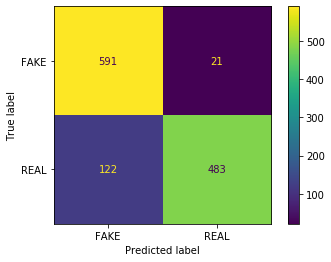

In [28]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, cohen_kappa_score,hamming_loss
# build the Bernoulli Naive Bayes classifiers
# with parameters, such as: 
# 1. alpha value for the Laplace estimator (smoothing)
# 2. binarize, the threshold/cutoff for 0 or 1 values
bNB = BernoulliNB(alpha=.0000001, binarize=0.0)
bNB.fit(X_train, train.label)
v1p = bNB.predict(X_test)
confusion_matrix(v1p, test.label)
plot_confusion_matrix(bNB, X_test, test.label, values_format='d');

acc = round(accuracy_score(v1p, test.label),2)
kappa = round(cohen_kappa_score(v1p, test.label),2)
hamming = round(hamming_loss(v1p, test.label),2)

In [29]:
df = pd.DataFrame(data=np.array(["Naive Bayes α1", acc, kappa,hamming]).reshape(1,4), 
                  columns=["Model","Accuracy","Kappa","Hamming Loss"])
df

,Model,Accuracy,Kappa,Hamming Loss
0,Naive Bayes α1,0.88,0.76,0.12


In [30]:
# try for different alpha
a = [0.1,0.001, 1,2 ]
for i in a:
    bNB = BernoulliNB(alpha=i)
    bNB.fit(X_train, train.label)
    print("Accuracy for alpha:", i, ":", bNB.score(X_test, test.label))

Accuracy for alpha: 0.1 : 0.866885784716516
Accuracy for alpha: 0.001 : 0.8734593262119967
Accuracy for alpha: 1 : 0.8414133114215283
Accuracy for alpha: 2 : 0.828266228430567


Best score is for alpha close to 0

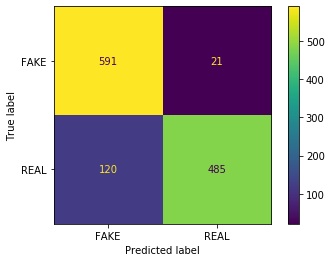

In [31]:
bNB = BernoulliNB(alpha=0.00000001)
bNB.fit(X_train, train.label)
v1p = bNB.predict(X_test)
confusion_matrix(v1p, test.label)
plot_confusion_matrix(bNB, X_test, test.label, values_format='d');
acc = round(accuracy_score(v1p, test.label),2)
kappa = round(cohen_kappa_score(v1p, test.label),2)
hamming = round(hamming_loss(v1p, test.label),2)

In [32]:
new_row = {"Model":"Naive Bayes α2","Accuracy": acc,"Kappa":kappa,"Hamming Loss":hamming}
df = df.append(new_row,ignore_index=True)
print (df.to_string(index=False))

          Model Accuracy Kappa Hamming Loss
 Naive Bayes α1     0.88  0.76         0.12
 Naive Bayes α2     0.88  0.77         0.12


### D.2. Linear Model (2 points)

#### D.2.1. Linearity

Remember the two terms $t_1$ and $t_2$ for two classes $c_1$ and $c_2$ you picked earlier? 

Scatter plot the training data with: 

1. [ ] $t_1$ and $t_2$ as the $X$ and $Y$ axes. 
2. [ ] **Color code** data points based on their classes $c_1$ and $c_2$. 
    + You only need to plot data in the two classes. 
    + Make sure the two colors are distinguishable. 
3. [ ] Discuss whether: 
    + The two classes are (roughly) **separable** on the plot? 
    + The two classes are **linearly** separable on the plot? 
    + (Optional) It is possible they are linearly separable in a higher dimensional space with **all term features**? 

In [33]:
train.reset_index(inplace=True)

# converting sparse matrix to a dataframe using terms t1 and t2
df = X_train.toarray()
df = df[:,[vect.vocabulary_[t1],vect.vocabulary_[t2]]]
df = pd.DataFrame(df, columns=["Term1", "Term2"])
df['label'] = train.label
df['class'] = df['label'].apply(lambda r : 1 if r == 'REAL' else 0)

In [34]:
df['class'].value_counts()

1    2566
0    2552
Name: class, dtype: int64

In [35]:
df.head()

,Term1,Term2,label,class
0,0,1,FAKE,0
1,0,0,REAL,1
2,5,1,FAKE,0
3,4,2,REAL,1
4,0,0,FAKE,0


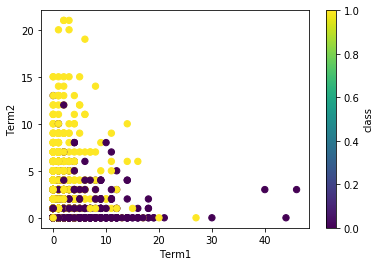

In [36]:
fig, ax1 = plt.subplots()
df.plot.scatter(x='Term1', y ='Term2',s= 40 ,c= 'class', cmap='viridis', ax=ax1);

Conclusion = The two classes are (roughly) **linearly separable** on the plot

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


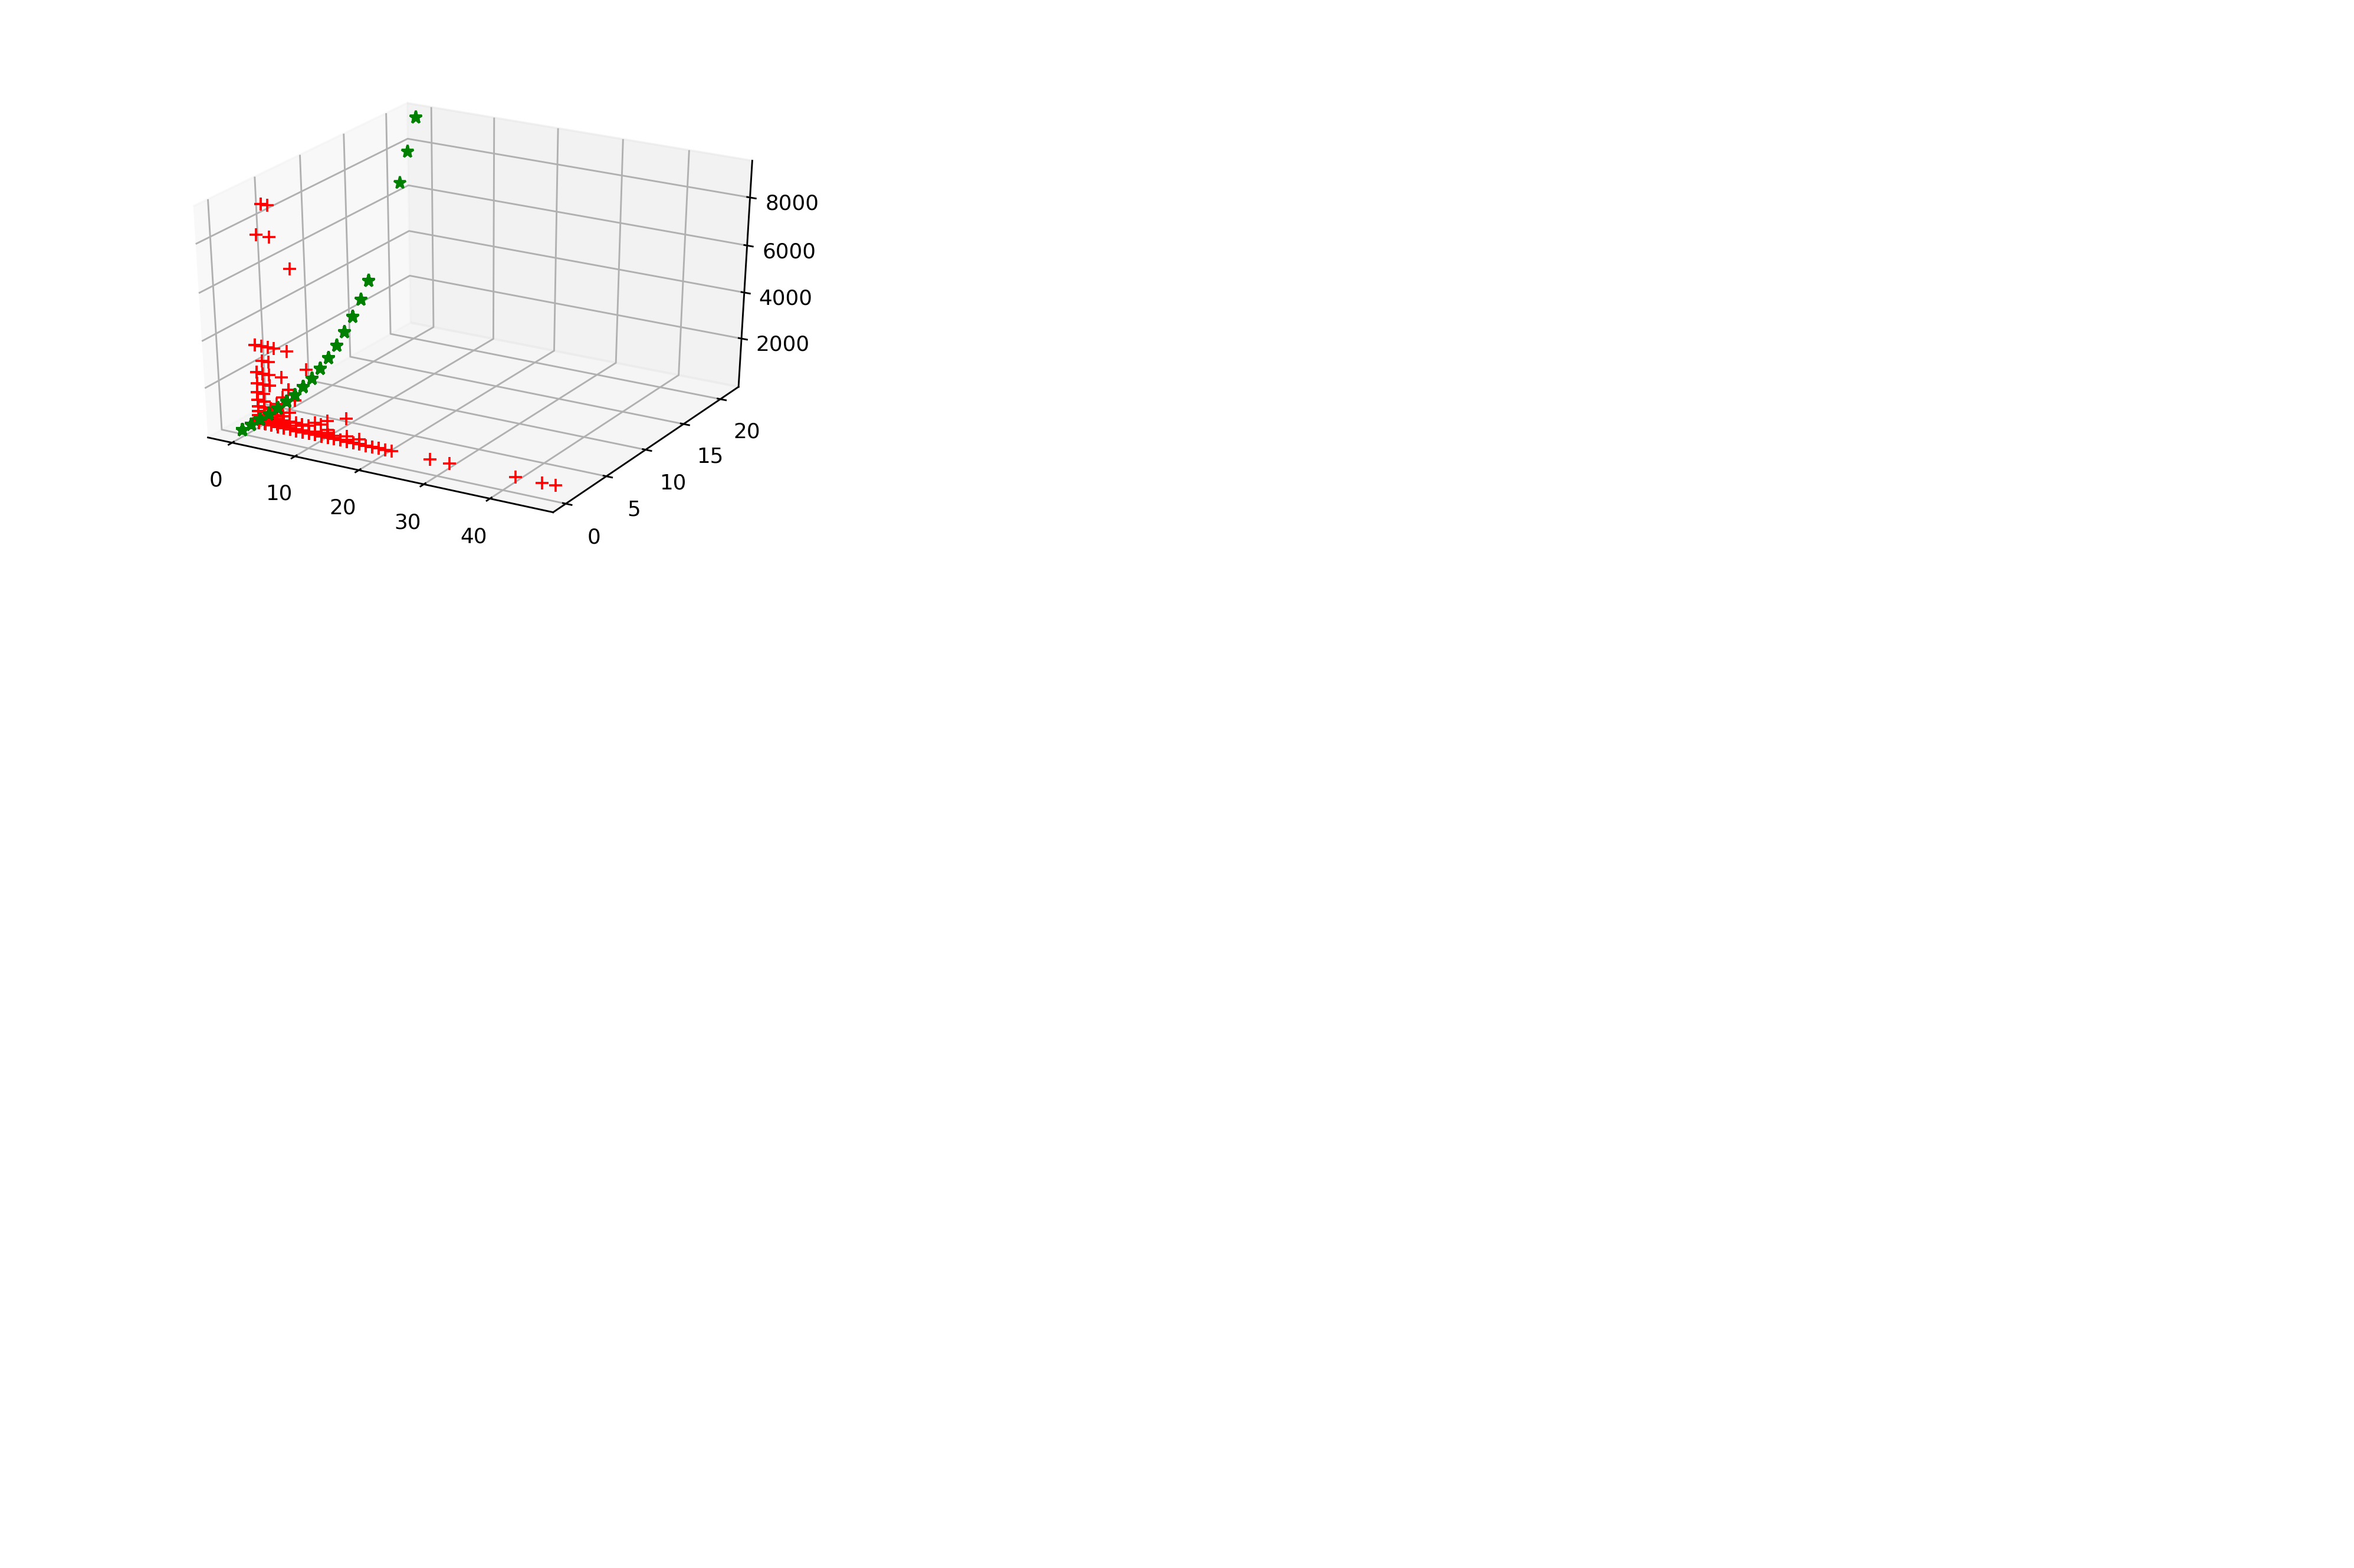

In [38]:
# Trying for higher dimensional space
df_new = df
df_new["HD2"] = df["Term2"] ** 3 + 50

#plotting in 3D
fig = plt.figure(figsize=(6,4))
ax= fig.add_subplot(111, projection= '3d')

x = df_new["Term1"]
y = df_new["Term2"]
z = df_new["HD2"]
C = df_new['class'] 

ax.plot(x, z, 'r+', zdir='y', zs=1.5)
ax.plot(y, z, 'g*', zdir='x', zs=-0.5);


It is possible these are linearly separable in a higher dimensional space with these features

#### D.2.2. Linear Classification

1. [ ] Pick a linear classification model: ```Perceptron``` **OR** ```sklearn.svm.LinearSVC```. 
2. [ ] Conduct the same experiments outlined in section D.1 (for the Naive Bayes model). 
3. [ ] Make sure you research the model, pick a **parameter**, and use **two** different values for the parameter to train, test, and evaluate the model. 

|  Model                 |  Accuracy   |  Kappa     |  3rd Metric  |
|------------------------|-------------|------------|--------------|
| Linear model, param1   |             |            |              |
| Linear model, param2   |             |            |              |

In [39]:
%matplotlib inline

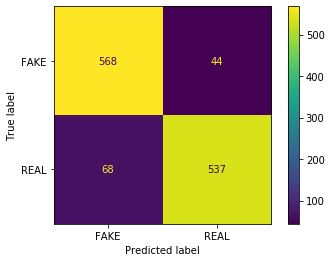

In [40]:
from sklearn.svm import LinearSVC
# 1st paramter C = 0.05
model = LinearSVC(max_iter = 10000, class_weight  = 'balanced', C=0.05).fit(X_train, train.label)
y_test = model.predict(X_test)

confusion_matrix(y_test, test.label)
plot_confusion_matrix(model, X_test, test.label, values_format='d');
acc = round(accuracy_score(y_test, test.label),2)
kappa = round(cohen_kappa_score(y_test, test.label),2)
hamming = round(hamming_loss(y_test, test.label),2)


In [41]:
df = pd.DataFrame(data=np.array(["Linear model, param1", acc, kappa,hamming]).reshape(1,4), 
                  columns=["Model","Accuracy","Kappa","Hamming Loss"])
df

,Model,Accuracy,Kappa,Hamming Loss
0,"Linear model, param1",0.91,0.82,0.09


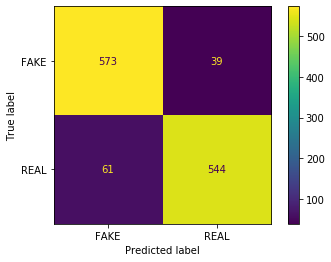

In [42]:
# 2nd paramter C = 0.1
model = LinearSVC(max_iter = 10000, class_weight  = 'balanced', C=0.01).fit(X_train, train.label)
y_test = model.predict(X_test)

confusion_matrix(y_test, test.label)
plot_confusion_matrix(model, X_test, test.label, values_format='d');
acc = round(accuracy_score(y_test, test.label),2)
kappa = round(cohen_kappa_score(y_test, test.label),2)
hamming = round(hamming_loss(y_test, test.label),2)

In [43]:
new_row = {"Model":"Linear model, param2","Accuracy": acc,"Kappa":kappa,"Hamming Loss":hamming}
df = df.append(new_row,ignore_index=True)
print (df.to_string(index=False))

                Model Accuracy Kappa Hamming Loss
 Linear model, param1     0.91  0.82         0.09
 Linear model, param2     0.92  0.84         0.08


### D.3 Non-linear Classification or Alternative (1 points)

Pick **one classification model** from the following: 
+ Non-linear Support Vector Machines (SVM) ```sklearn.svm.SVC```
+ Decision Tree: ```sklearn.tree.DecisionTreeClassifier```
+ Lazy Learning: ```sklearn.neighbors.KNeighborsClassifier```
+ Or any other classification model in ```sklearn```

Conduct the **same analysis as in D.2.2.**

|  Model                 |  Accuracy   |  Kappa     |  3rd Metric  |
|------------------------|-------------|------------|--------------|
| Third model, param1    |             |            |              |
| Third model, param2    |             |            |              |

In [1]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, train.label)
y_test = model.predict(X_test)

confusion_matrix(y_test, test.label)
plot_confusion_matrix(model, X_test, test.label, values_format='d');
acc = round(accuracy_score(y_test, test.label),2)
kappa = round(cohen_kappa_score(y_test, test.label),2)
hamming = round(hamming_loss(y_test, test.label),2)

NameError: name 'X_train' is not defined

In [45]:
df = pd.DataFrame(data=np.array(["Third model, param1", acc, kappa,hamming]).reshape(1,4), 
                  columns=["Model","Accuracy","Kappa","Hamming Loss"])

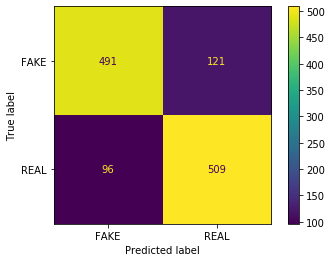

In [46]:
model = DecisionTreeClassifier(criterion='entropy').fit(X_train, train.label)
y_test = model.predict(X_test)

confusion_matrix(y_test, test.label)
plot_confusion_matrix(model, X_test, test.label, values_format='d');
acc = round(accuracy_score(y_test, test.label),2)
kappa = round(cohen_kappa_score(y_test, test.label),2)
hamming = round(hamming_loss(y_test, test.label),2)

In [47]:
new_row = {"Model":"Third model, param2","Accuracy": acc,"Kappa":kappa,"Hamming Loss":hamming}
df = df.append(new_row,ignore_index=True)
print (df.to_string(index=False))

               Model Accuracy Kappa Hamming Loss
 Third model, param1     0.83  0.65         0.17
 Third model, param2     0.82  0.64         0.18


## E. Conclusion (1 point)

+ [ ] Compare the results in section D. 
+ [ ] Review your classification task and objectives. 
+ [ ] Which model gives you the best result so far? Why? 
+ [ ] Thoughts on future work on the data? 